In [2]:
import pandas
import pydicom
import matplotlib.pyplot as plt
import random
import json

# Images with special fov type

In [29]:
# import the csv file with the metadata
metadata = pandas.read_csv('metadata/metadata_FP.csv')
# show all posible values appearing in the fov_type column
FOV_types = metadata['fov_type'].unique()
print(f'FOV types: {FOV_types}')
# count how many images we have in each FOV type
FOV_counts = metadata['fov_type'].value_counts()
print(f'FOV counts: \n{FOV_counts}')

# get all the images with a specific fov type
fov = FOV_types[7]
print(f'FOV type: {fov}')
contact_images = metadata[metadata['fov_type'] == fov]
# count how many clinet_id there are in the contact_images
client_counts = contact_images['client_id'].value_counts()
print(f'Client counts with {fov}: {len(client_counts)}')
# show some images of the same client under these categoriy
client_num = 0
client_example = client_counts.index[client_num] # first client
pick = contact_images[contact_images['client_id'] == client_example] # get df with client pick
paths = pick['path'].values # get the paths
# save as output
pick.to_csv(f'metadata/output.csv', index=False)

FOV types: [nan '2D_BIOPSY' '2D_MAGNIFICATION' '2D_CONTACT' '3D_STANDARD_15P'
 '28616.8' '24910.6' '14956.3' '23215.5' '18813.2' '31125.9' '29538.7'
 '31616.6' '42014.1' '39421.1' '25968.1' '20470.2' '30456.4' '23540.8'
 '20499.3' '24002.4' '21781.5' '28453.3' '15603.2' '29736.6' '28644.8'
 '25379.5' '32016.0' '35841.6' '20000.3' '17887.2' '25443.8' '21006.1'
 '17361.1' '34704.3' '37409.9' '17708.5' '39222.1' '34634.2' '34907.3'
 '30494.9' '17991.6' '18587.9' '33570.2' '27513.3' '25702.0' '23866.7'
 '23698.0' '23286.7' '27124.7' '26815.4' '14897.8' '14935.2' '26000.2'
 '18383.4' '29603.9' '44223.9' '40179.9' '28143.6' '31261.8' '32095.6'
 '31638.2' '23363.3' '21167.8' '22213.0' '18148.6' '29389.9' '27199.0'
 '38499.4' '33737.3' '24699.3' '23929.7' '20850.6' '28507.3' '15741.7'
 '16355.5' '27856.6' '28893.7' '29844.9' '25124.3' '26655.0' '32473.9'
 '17629.4' '19809.2' '38009.5' '44009.9' '28262.9' '43184.3' '20607.8'
 '20679.9' '22907.2' '32985.8' '30294.5' '27345.7' '34281.5' '30992.8'

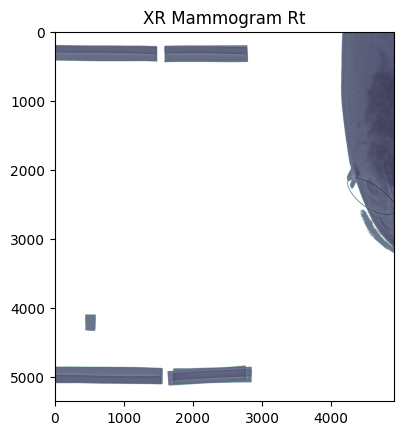

In [30]:
# open the first image and plot it
for i, path in enumerate(paths):
    image = pydicom.dcmread(path)
    # get side from the side_view columno f the pick df
    side = pick.iloc[i]['procedure_descrip']
    plt.figure()
    plt.imshow(image.pixel_array, cmap=plt.cm.bone)
    plt.title(side)

We filter all images with any special FOV type.

In [33]:
# keep only the images with no fov_type
metadata_noFOV = metadata[metadata['fov_type'].isna()]
print(f'Number of images with no fov_type: {len(metadata_noFOV)}')
print(f'The number of lcients_id is {len(metadata_noFOV["client_id"].unique())}')
# save metadata_noFOV as csv file
metadata_noFOV.to_csv('metadata/metadata_noFOV.csv', index=False)

Number of images with no fov_type: 77035
The number of lcients_id is 5982


# Implant

Implant counts: 
NO     74020
YES      299
Name: implant, dtype: int64


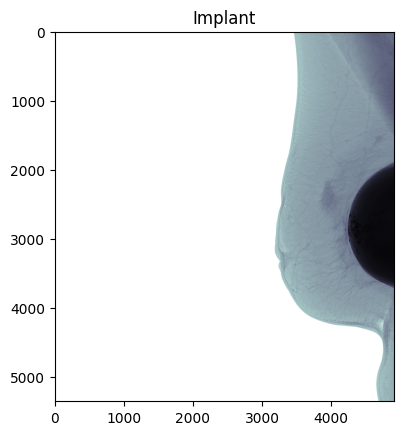

In [46]:
# import the csv file with the metadata
metadata = pandas.read_csv('metadata/metadata_noFOV.csv')
# get all unique values for the side_view column and count them
side_counts = metadata['implant'].value_counts()
print(f'Implant counts: \n{side_counts}')
# get images with implant
implant_images = metadata[metadata['implant'] == 'YES']
paths = implant_images['path'].values
path = random.choice(paths)
plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
plt.title('Implant')

# save metadata wihout implant images
metadata_noImplant = metadata[metadata['implant'] != 'YES']
# save
metadata_noImplant.to_csv('metadata/metadata_noImplant.csv', index=False)

# Row and column sizes

Row sizes porcentage: 
3328    0.497081
4096    0.226061
707     0.067231
2294    0.059138
794     0.041011
          ...   
3228    0.000013
2550    0.000013
2248    0.000013
1840    0.000013
2340    0.000013
Name: rows, Length: 125, dtype: float64

Row size: 3506
Number of images with row size 3506: 5


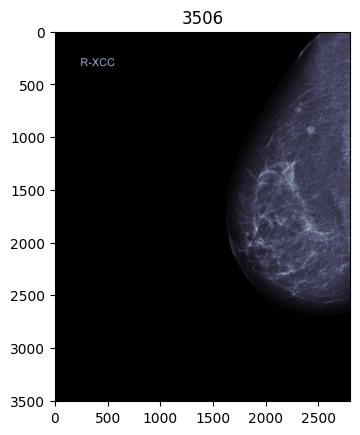

In [105]:
metadata_noImplant = pandas.read_csv('metadata/metadata_noImplant.csv')
metadata_len = len(metadata_noImplant)
# get all unique values for the rows column and count them
rows_counts = metadata_noImplant['rows'].value_counts()
rows_counts.to_csv('metadata/output.csv')
rows_values = rows_counts.index
#print(f'Row sizes counts: \n{rows_counts}\n')
print(f'Row sizes porcentage: \n{rows_counts / metadata_len}\n')
row = rows_values[25]
print(f'Row size: {row}')
print(f'Number of images with row size {row}: {rows_counts[row]}')
metadata_rows = metadata_noImplant[metadata_noImplant['rows'] == row]
client = random.choice(metadata_rows['client_id'].unique())
metadata_client = metadata_rows[metadata_rows['client_id'] == client]
# metadata_client.to_csv('metadata/output.csv', index=False)
paths = metadata_client['path'].values
for path in paths:
    plt.figure()
    plt.imshow(pydicom.dcmread(path).pixel_array, cmap=plt.cm.bone)
    plt.title(f'{row}')